# Supermarket sales analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# Converting time to hour and minute to analyse sales based on time of day

df['Hour'] = df['Time'].str[0:2].astype(int)
df['Minute'] = df['Time'].str[3:5].astype(int)

In [7]:
df['Date'].dt.day_name()

0      Saturday
1        Friday
2        Sunday
3        Sunday
4        Friday
         ...   
995     Tuesday
996    Saturday
997    Saturday
998      Friday
999      Monday
Name: Date, Length: 1000, dtype: object

In [8]:
# Converting Date column to day name and month

df['Day'] = df['Date'].dt.day_name()
df['Month'] = (df['Date']).dt.month

In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Minute,Day,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,13,8,Saturday,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,10,29,Friday,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,13,23,Sunday,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,20,33,Sunday,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,10,37,Friday,2


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
Hour,1000.0,14.910000,3.186857e+00,10.000000,12.000000,15.000000,18.000000,20.000000
Minute,1000.0,30.098000,1.688068e+01,0.000000,16.000000,30.000000,44.000000,59.000000


In [11]:
uniqueValues = df.nunique()

print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
Hour                         11
Minute                       60
Day                           7
Month                         3
dtype: int64


## Visualisations

In [12]:
sns.set_palette('rocket_r')

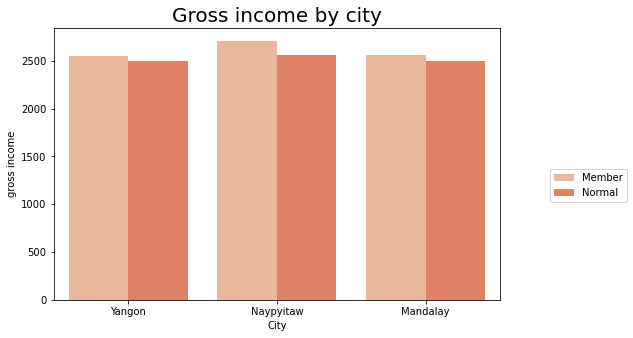

In [13]:
plt.figure(figsize=(8,5))

sns.barplot(data=df,x='City',y='gross income',hue='Customer type',estimator=sum,ci=None)

plt.title('Gross income by city',fontsize=20) #same in this case as only 1 branch per city
plt.legend(bbox_to_anchor=(1.1, 0.5));

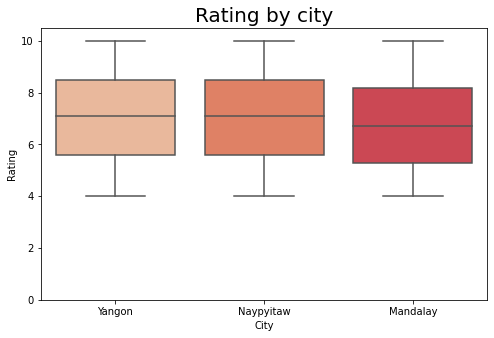

In [14]:
plt.figure(figsize=(8,5))

sns.boxplot(data=df,x='City',y='Rating')

plt.title('Rating by city',fontsize=20) #same in this case as only 1 branch per city
plt.ylim(0,10.5);

In [15]:
df['Day'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

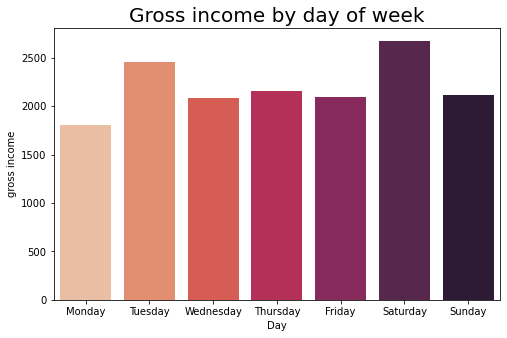

In [16]:
plt.figure(figsize=(8,5))

sns.barplot(data=df,x='Day',y='gross income',estimator=sum,ci=None,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday',],palette='rocket_r')
       
plt.title('Gross income by day of week',fontsize=20); #same in this case as only 1 branch per city

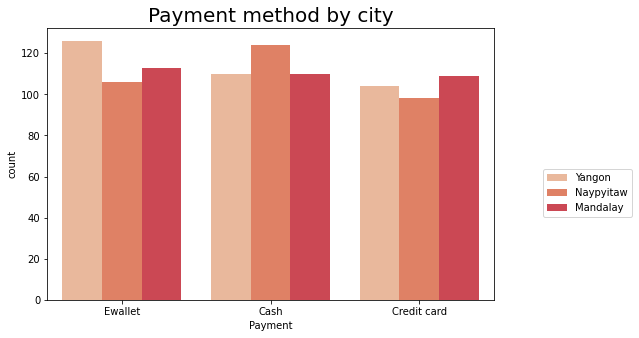

In [17]:
plt.figure(figsize=(8,5))

sns.countplot(data=df,x='Payment',hue='City')

plt.title('Payment method by city',fontsize=20)
plt.legend(bbox_to_anchor=(1.1, 0.5));

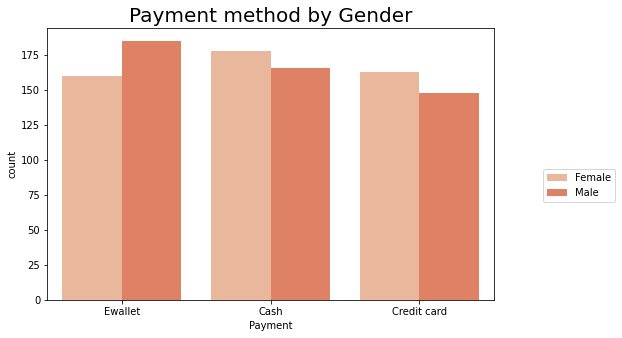

In [22]:
plt.figure(figsize=(8,5))

sns.countplot(data=df,x='Payment',hue='Gender')

plt.title('Payment method by Gender',fontsize=20)
plt.legend(bbox_to_anchor=(1.1, 0.5));

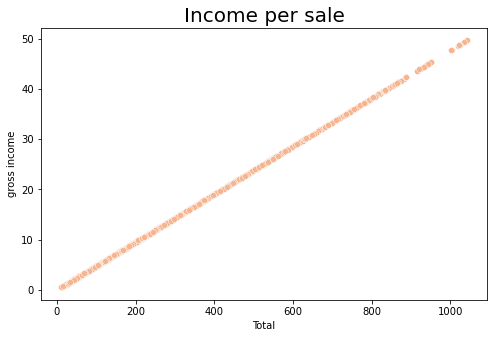

In [18]:
plt.figure(figsize=(8,5))

sns.scatterplot(data=df,x='Total',y='gross income');

plt.title('Income per sale',fontsize=20);

As expected, since there is only 1 gross margin %. The gross income/total sales scatterplot is a straight line

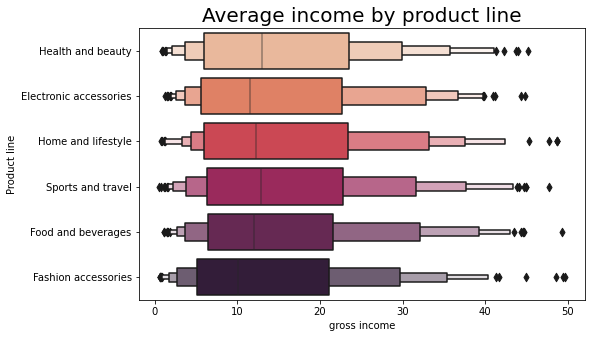

In [19]:
plt.figure(figsize=(8,5))

sns.boxenplot(data=df,x='gross income',y='Product line')

plt.title('Average income by product line',fontsize=20);

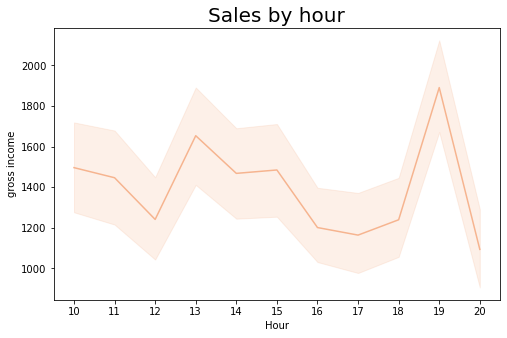

In [20]:
plt.figure(figsize=(8,5))

sns.lineplot(data=df,x='Hour',y='gross income',estimator=sum)

plt.title('Sales by hour',fontsize=20) #same in this case as only 1 branch per city
plt.xticks(np.arange(10,21,1));